#### Object detector and count model setup

In [ ]:
import os
import locale
locale.getpreferredencoding = lambda: "UTF-8"

HOME = os.getcwd()
print(HOME)

%cd {HOME}
!mkdir {HOME}/Detection
%cd {HOME}/Detection
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/Detection/GroundingDINO
!pip install -q -e .
!pip install -q roboflow
!pip install gradio

CONFIG_PATH = os.path.join(HOME, "Detection" ,"GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
# print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

%cd {HOME}/Detection
!mkdir {HOME}/Detection/weights
%cd {HOME}/Detection/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "Detection" ,"weights", WEIGHTS_NAME)
# print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

%cd {HOME}
!mkdir {HOME}/Detection/Data
%cd {HOME}/Detection/Data

!git clone https://github.com/kunaltrumind/Data.git

%cd {HOME}/Detection/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content
/content
/content/Detection
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 388, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 388 (delta 20), reused 33 (delta 13), pack-reused 336
Receiving objects: 100% (388/388), 12.86 MiB | 16.40 MiB/s, done.
Resolving deltas: 100% (182/182), done.
/content/Detection/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.5 MB/s e

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


#### Input images enhancement using Contrast limited adaptive histogram equalisation

/content
/content/Detection/Enhancement_CLAHE


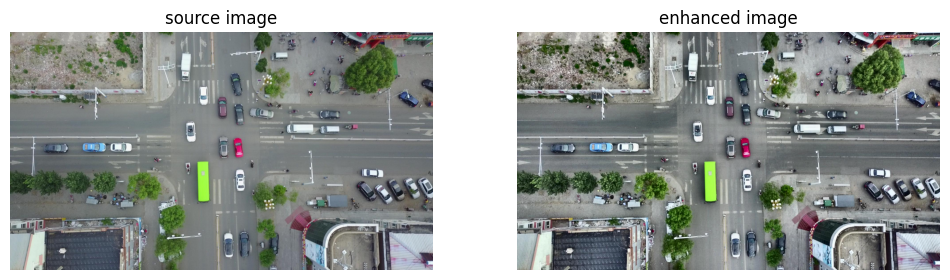

In [ ]:
import cv2
import supervision as sv

# Read the input image
image = cv2.imread('/content/Detection/Data/Data/Top_view/0000001.jpg')

# Convert the image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into L, A, and B channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Apply CLAHE to the L channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_l_channel = clahe.apply(l_channel)

# Merge the enhanced L channel with the original A and B channels
enhanced_lab_image = cv2.merge((enhanced_l_channel, a_channel, b_channel))

# Convert the enhanced LAB image back to BGR color space
enhanced_image = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2BGR)

# Save the enhanced image
%cd {HOME}
!mkdir {HOME}/Detection/Enhancement_CLAHE
%cd {HOME}/Detection/Enhancement_CLAHE

filename = 'Enhanced_img_top.jpg'
cv2.imwrite(filename, enhanced_image)
# Display the original and enhanced images
#cv2_imshow(image)
#cv2_imshow(enhanced_image)
sv.plot_images_grid(
    images=[image, enhanced_image],
    grid_size=(1, 2),
    titles=['source image', 'enhanced image']
)


## Gradio

In [ ]:
%cd /content/Detection/GroundingDINO
!python /content/Detection/GroundingDINO/demo/gradio_app.py

#### Object count model

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


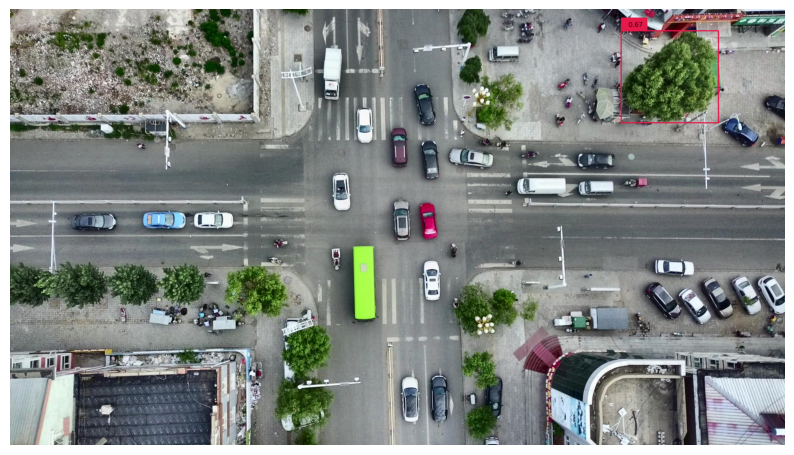

Number of Trees are :  1


In [ ]:
import os
import supervision as sv

IMAGE_NAME = "Enhanced_img_top.jpg"
IMAGE_PATH = os.path.join(HOME, "Detection" , "Enhancement_CLAHE" , IMAGE_NAME)

TEXT_PROMPT = "bush"
BOX_TRESHOLD = 0.65
TEXT_TRESHOLD = 1

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (10, 10))

print("Number of Trees are : ", len(boxes))

#### Depth Estimation model setup

In [ ]:
%cd {HOME}
!mkdir {HOME}/Depth_estimation
%cd {HOME}/Depth_estimation

# Code section 1

!mkdir -p inputs
!mkdir -p outputs_midas
!mkdir -p outputs_leres
!mkdir -p outputs_midas_r20
!mkdir -p outputs_midas_r0
!mkdir -p outputs_leres_r20
!mkdir -p outputs_leres_r0


# Clone git repo
!git clone https://github.com/compphoto/BoostingMonocularDepth.git

!wget https://sfu.ca/~yagiz/CVPR21/latest_net_G.pth
#!gdown https://drive.google.com/u/0/uc?id=1cU2y-kMbt0Sf00Ns4CN2oO9qPJ8BensP&export=download

# Downloading merge model weights
!mkdir -p /content/Depth_estimation/BoostingMonocularDepth/pix2pix/checkpoints/mergemodel/
!mv latest_net_G.pth /content/Depth_estimation/BoostingMonocularDepth/pix2pix/checkpoints/mergemodel/

# Downloading Midas weights
!wget https://github.com/AlexeyAB/MiDaS/releases/download/midas_dpt/midas_v21-f6b98070.pt
!mv midas_v21-f6b98070.pt /content/Depth_estimation/BoostingMonocularDepth/midas/model.pt

# # Downloading LeRes weights
!wget https://cloudstor.aarnet.edu.au/plus/s/lTIJF4vrvHCAI31/download
!mv download /content/Depth_estimation/BoostingMonocularDepth/res101.pth

%cd /content/Depth_estimation/BoostingMonocularDepth

/content
/content/Depth_estimation
Cloning into 'BoostingMonocularDepth'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 318 (delta 9), reused 15 (delta 8), pack-reused 301
Receiving objects: 100% (318/318), 55.51 MiB | 31.56 MiB/s, done.
Resolving deltas: 100% (125/125), done.
--2023-07-11 07:33:07--  https://sfu.ca/~yagiz/CVPR21/latest_net_G.pth
Resolving sfu.ca (sfu.ca)... 142.58.228.150, 142.58.103.17, 142.58.103.137, ...
Connecting to sfu.ca (sfu.ca)|142.58.228.150|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.sfu.ca/~yagiz/CVPR21/latest_net_G.pth [following]
--2023-07-11 07:33:07--  https://www.sfu.ca/~yagiz/CVPR21/latest_net_G.pth
Resolving www.sfu.ca (www.sfu.ca)... 142.58.228.150
Connecting to www.sfu.ca (www.sfu.ca)|142.58.228.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318268048 (304M)

## MiDaS Depth Estimator

In [ ]:
# Running the method using MiDas
!python run.py --Final --data_dir /content/Detection/Enhancement_CLAHE --output_dir  /content/Depth_estimation/outputs_midas/ --depthNet 0
!python run.py --R0 --data_dir /content/Depth_estimation/inputs --output_dir /content/Depth_estimation/outputs_midas_r0/ --depthNet 0
!python run.py --R20 --data_dir /content/Depth_estimation/inputs --output_dir /content/Depth_estimation/outputs_midas_r20/ --depthNet 0

device: cuda
Namespace(data_dir='/content/Detection/Enhancement_CLAHE', output_dir='/content/Depth_estimation/outputs_midas/', savepatchs=0, savewholeest=0, output_resolution=1, net_receptive_field_size=None, pix2pixsize=1024, depthNet=0, colorize_results=False, R0=False, R20=False, Final=True, max_res=inf)
----------------- Options ---------------
                    Final: True                          	[default: False]
                       R0: False                         
                      R20: False                         
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./pix2pix/checkpoints         
         colorize_results: False                         
                crop_size: 672                           
                 data_dir: /content/Detection/Enhancement_CLAHE	[default: None]
                 dataroot: None                          
             dataset_mode: dep